In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [2]:
flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,subdistrict_name,lat_long,avg_demand_baseline,demand_target
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,"-6.13727,106.7153587",57,85.5
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,"-6.1385859,106.7293052",33,49.5
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,"-6.1715044,106.7056503",25,37.5
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,"-6.1613339,106.7294525",40,60.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,"-6.159495,106.7897422",153,229.5
...,...,...,...,...,...,...,...
185,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,"-6.1852948,106.8073138",45,67.5
186,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,"-6.2076699,106.8075363",240,360.0
187,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,"-6.1906249,106.8072637",99,148.5
188,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,"-6.1968299,106.8074788",37,55.5


In [3]:
# add distancce in dataframe from current loc

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,37,55.5,-6.196830,106.807479


In [4]:
lat_lng_dataset = dataset[['lat', 'long']]
other_dataset = dataset[['avg_demand_baseline']]


In [5]:
#Rescaling
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(other_dataset)
scaled_dataset = pd.DataFrame(scaled_dataset, columns=["avg_demand_baseline"])
train_dataset = pd.concat([lat_lng_dataset, scaled_dataset],axis=1)
train_dataset

,lat,long,avg_demand_baseline
0,-6.137270,106.715359,-0.392730
1,-6.138586,106.729305,-0.785633
2,-6.171504,106.705650,-0.916601
3,-6.161334,106.729452,-0.671037
4,-6.159495,106.789742,1.178881
...,...,...,...
185,-6.185295,106.807314,-0.589182
186,-6.207670,106.807536,2.603154
187,-6.190625,106.807264,0.294849
188,-6.196830,106.807479,-0.720150


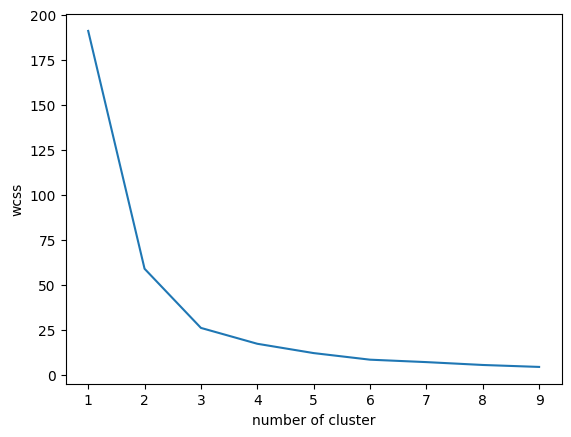

In [6]:
# Elbow method
wcss = []
crange = 10
for i in range(1, crange):
    kmeans = KMeans(n_clusters=i, init='random', random_state=50)
    kmeans.fit(train_dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, crange), wcss)
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [7]:
cluster_final = 3
km = KMeans(n_clusters=cluster_final, init='random', random_state=50)
km.fit(train_dataset)

KMeans(init='random', n_clusters=3, random_state=50)

In [8]:
clusters = km.cluster_centers_
print(clusters)

[[ -6.20941809 106.82540356  -0.74303364]
 [ -6.21476853 106.81465779   0.20668018]
 [ -6.2000445  106.79814236   2.02350058]]


In [9]:
y_km = km.fit_predict(train_dataset)
dataset = dataset.assign(pred=y_km)
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359,0
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305,0
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650,0
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452,0
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742,2
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,45,67.5,-6.185295,106.807314,0
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,240,360.0,-6.207670,106.807536,2
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,99,148.5,-6.190625,106.807264,1
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,37,55.5,-6.196830,106.807479,0


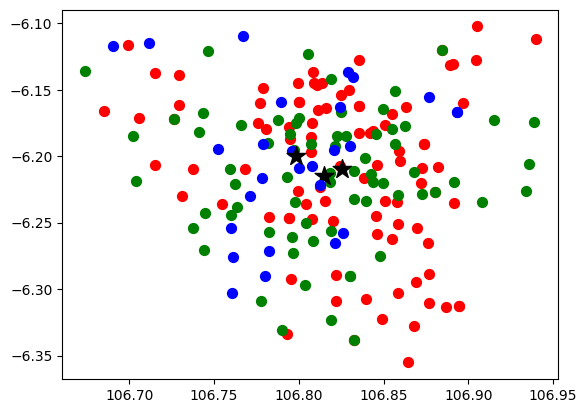

In [10]:
label_a = ("long",1)
label_b = ("lat", 0)
color_list = ["red", "green", "blue", "yellow", "pink", "orange", "purple"]
for i in range(cluster_final):
    plt.scatter(train_dataset[y_km==i][label_a[0]], train_dataset[y_km==i][label_b[0]], s=50, color=color_list[i%len(color_list)])
    plt.scatter(clusters[i][label_a[1]], clusters[i][label_b[1]], marker="*", s=200, color="black")

plt.show()


In [11]:
#Silhoutte Score
s_score = silhouette_score(train_dataset, km.labels_, metric='euclidean')
print("sihoute score is ", s_score)

sihoute score is  0.5702443137706035
